In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [5]:
print(__doc__)

Automatically created module for IPython interactive environment


In [11]:
coordinates_all_80 = pd.read_csv("IdsAndCoord08.csv")
coordinates_all_65 = pd.read_csv("IdsAndCoordAll065.csv")

In [13]:
# print(coordinates.head())
coordinates_80 = coordinates_all_80[["long","lang"]]
coordinates_65 = coordinates_all_65[["long","lang"]]

In [14]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

def generate_cluster_analysis(coordinates, coordinates_all,generate_file):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(coordinates) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(coordinates)
        
        if(generate_file):
#             print(cluster_labels)
            coordinates_all["cluster_label"] = cluster_labels

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(coordinates, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(coordinates, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(coordinates.long, coordinates.lang, marker='.', s=30, lw=0, alpha=0.7,
                     c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    if(generate_file):
        generate_business_dictionary(coordinates_all)

For n_clusters = 14 The average silhouette_score is : 0.663108228070422


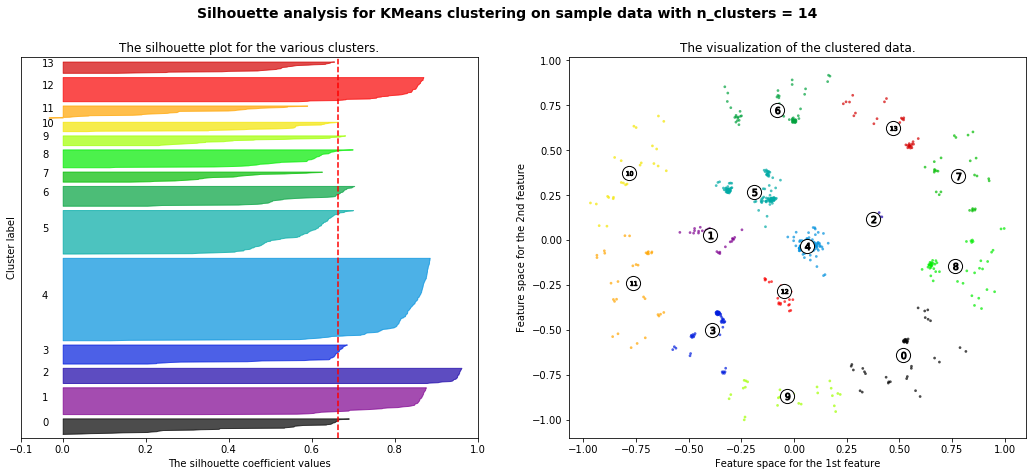

In [16]:
range_n_clusters = list(range(14,15))
generate_cluster_analysis(coordinates_65,coordinates_all_65, False)

For n_clusters = 14 The average silhouette_score is : 0.663108228070422


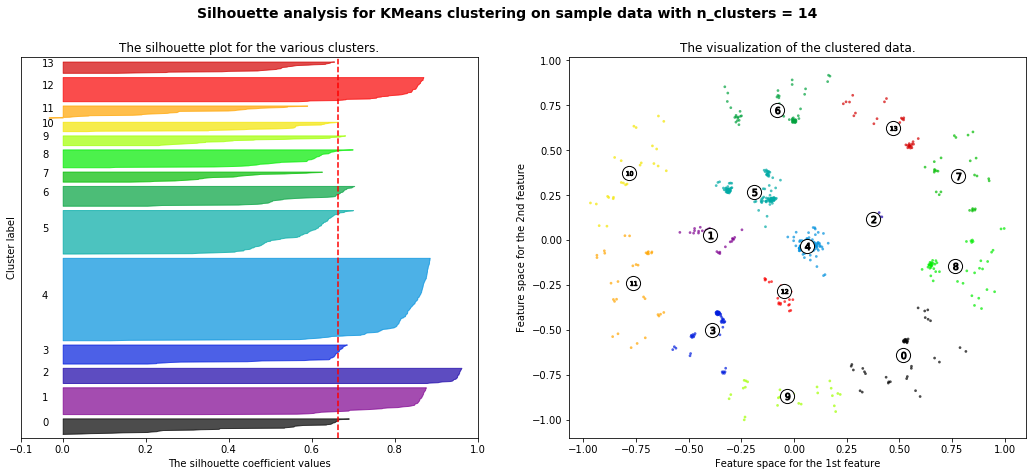

generating_dicts
     Unnamed: 0    id      long      lang  cluster_label
0             0  4096 -0.002148  0.665249              6
1             1  4100  0.045048 -0.047504              4
2             2  4101  0.044515 -0.061546              4
3             3  4103  0.062718 -0.006136              4
4             4  4104  0.140194 -0.197400              4
5             5  4108 -0.007037  0.661283              6
6             6  4110  0.051527 -0.023586              4
7             7  4111  0.050676 -0.042857              4
8             8  4113  0.132839 -0.037652              4
9             9  4114  0.377576  0.125350              2
10           10  4115  0.056092 -0.013399              4
11           11  4116  0.056331 -0.013794              4
12           12  4118  0.023933 -0.045432              4
13           13  4121  0.049152 -0.055927              4
14           14  4122  0.047134 -0.043806              4
15           15  4127  0.622136  0.406358              7
16           1

In [68]:
#seleting 14 clusters for threshold of 0.65
#create dictionary
range_n_clusters = [14]
generate_cluster_analysis(coordinates_65,coordinates_all_65,True)
# print(coordinates_all_65)

In [43]:
len(coordinates_65)

829

In [44]:
len(coordinates_80)

593

For n_clusters = 2 The average silhouette_score is : 0.34976722510537084
For n_clusters = 3 The average silhouette_score is : 0.4238843928319378
For n_clusters = 4 The average silhouette_score is : 0.4216565458585938
For n_clusters = 5 The average silhouette_score is : 0.48039530051189117
For n_clusters = 6 The average silhouette_score is : 0.5208834260667468
For n_clusters = 7 The average silhouette_score is : 0.5363400340348224
For n_clusters = 8 The average silhouette_score is : 0.5243382261103489
For n_clusters = 9 The average silhouette_score is : 0.5241359394782314
For n_clusters = 10 The average silhouette_score is : 0.5367316990657445
For n_clusters = 11 The average silhouette_score is : 0.5393709313947378
For n_clusters = 12 The average silhouette_score is : 0.5344760861078617
For n_clusters = 13 The average silhouette_score is : 0.5565319385744575
For n_clusters = 14 The average silhouette_score is : 0.5612388523433297


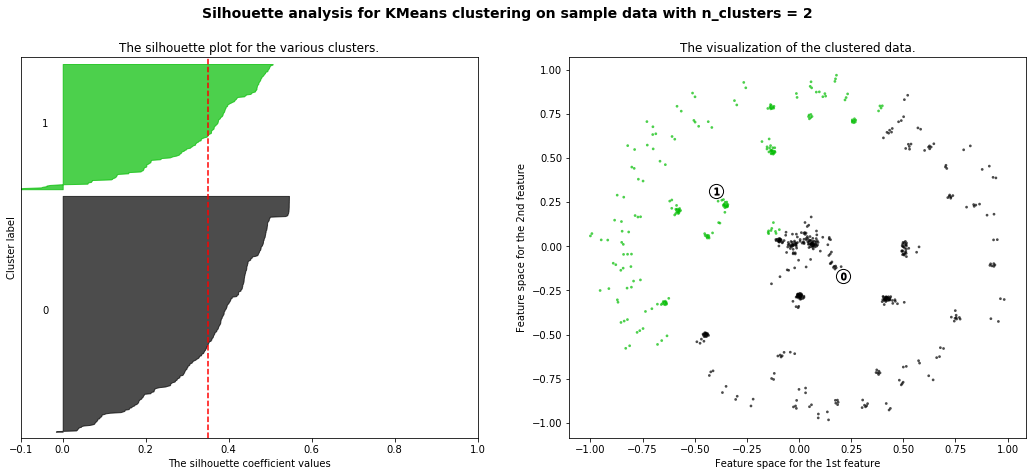

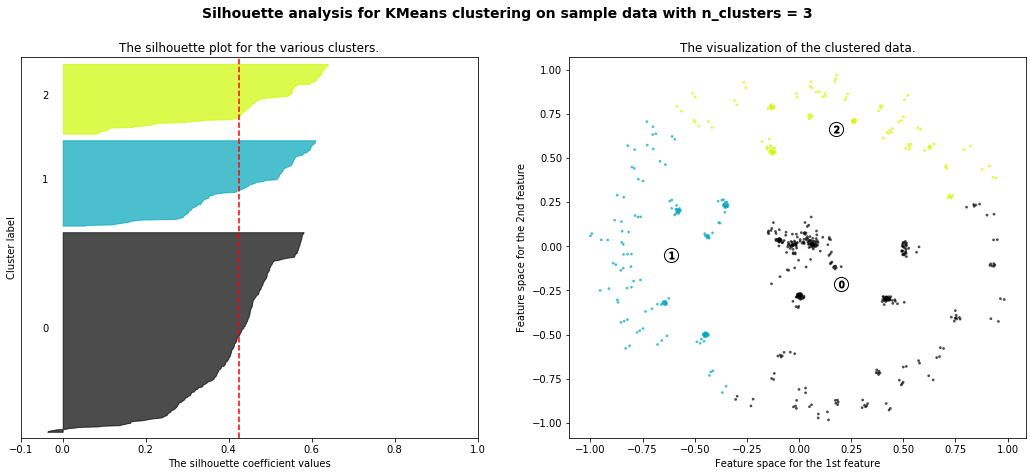

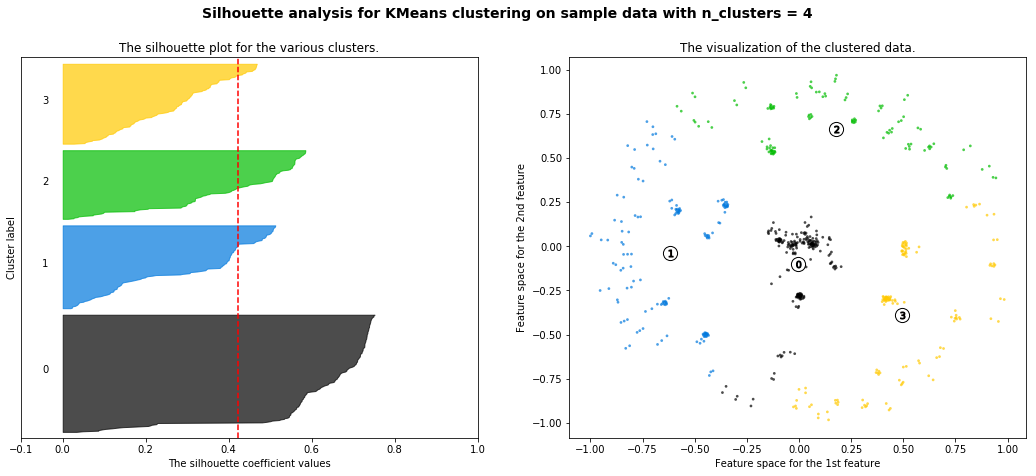

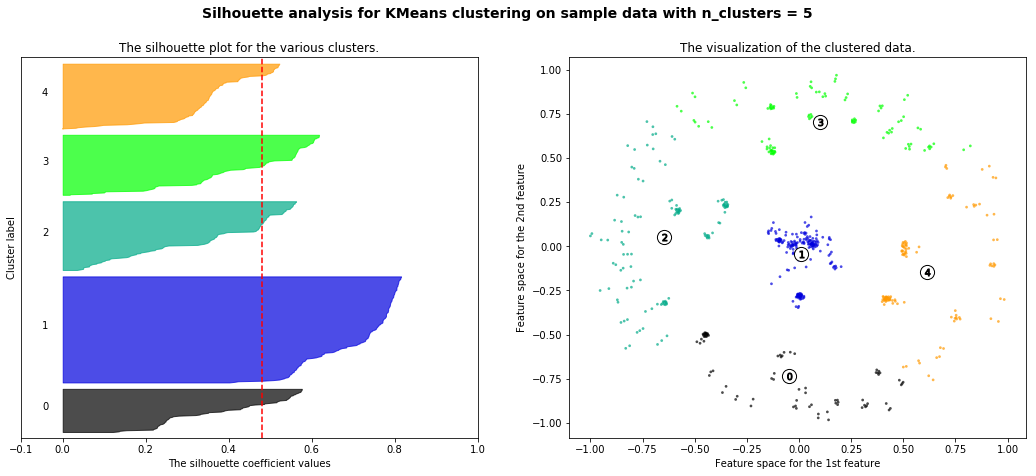

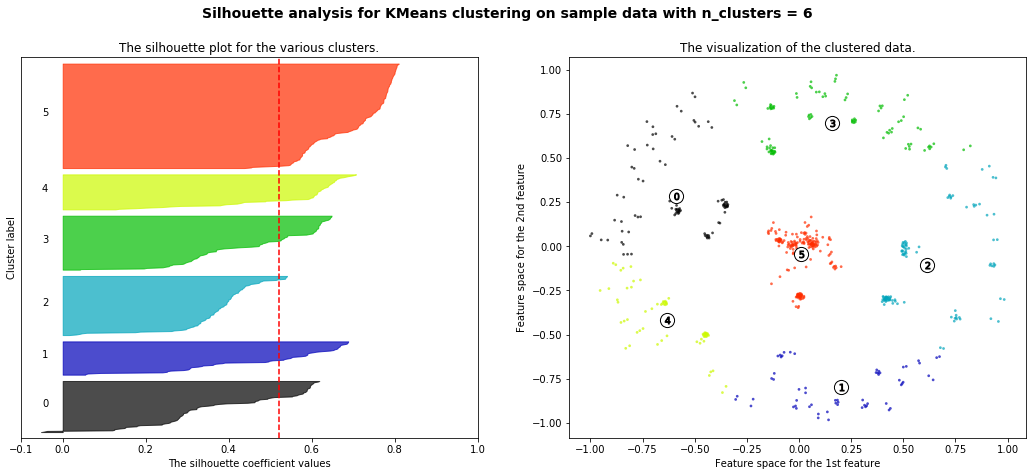

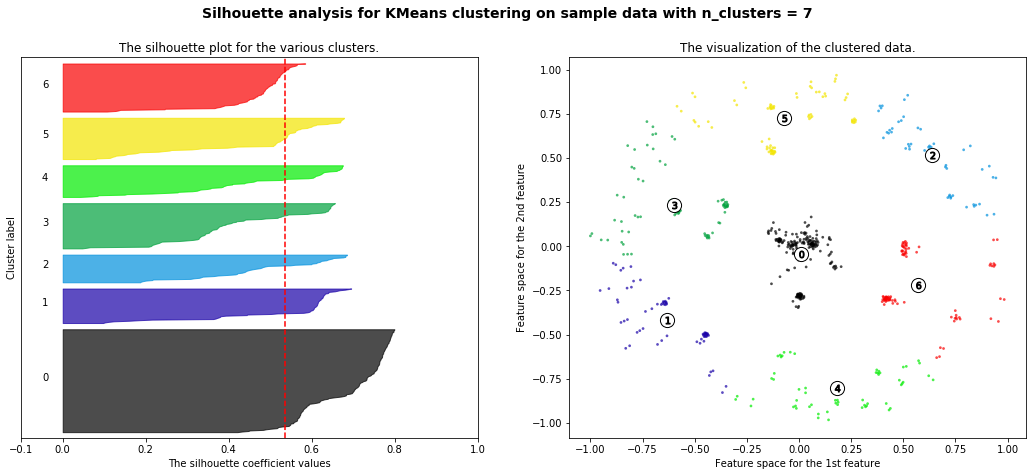

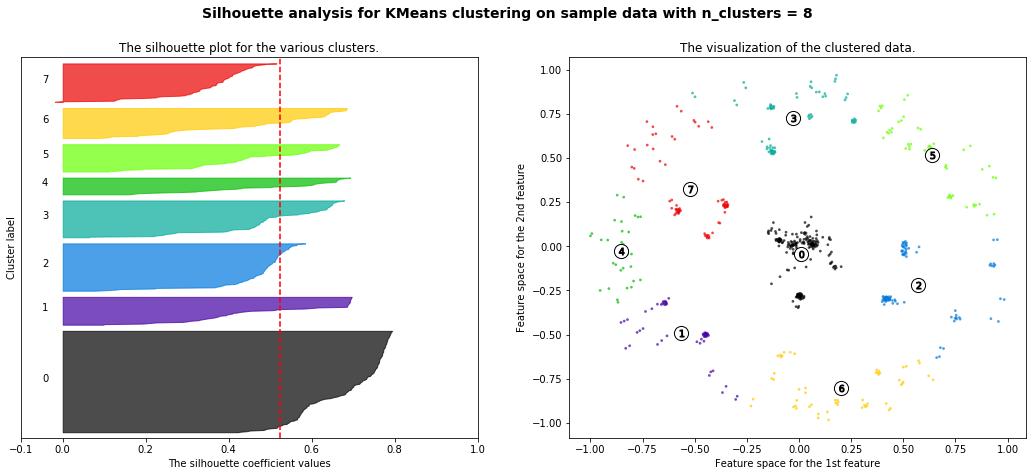

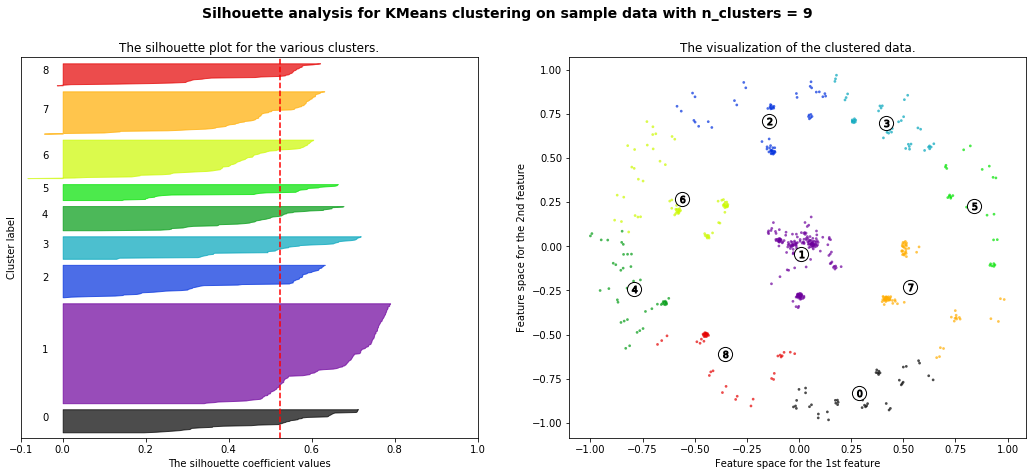

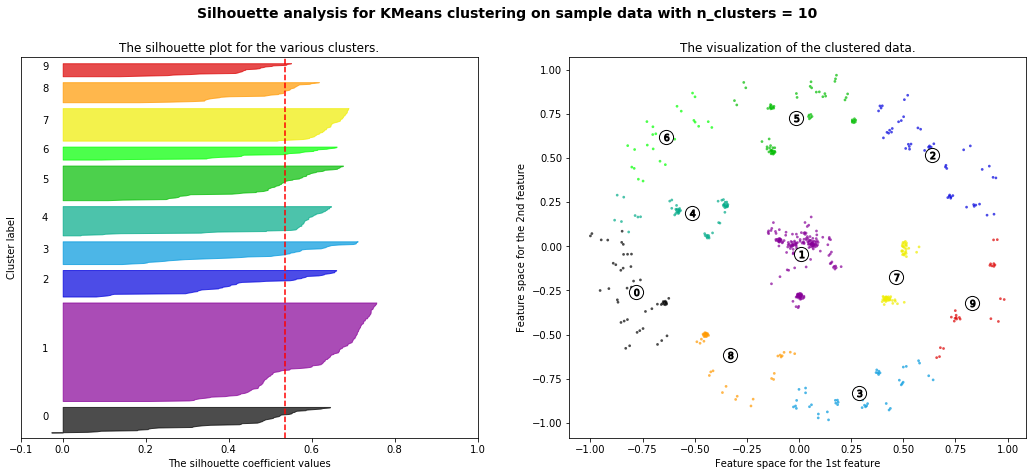

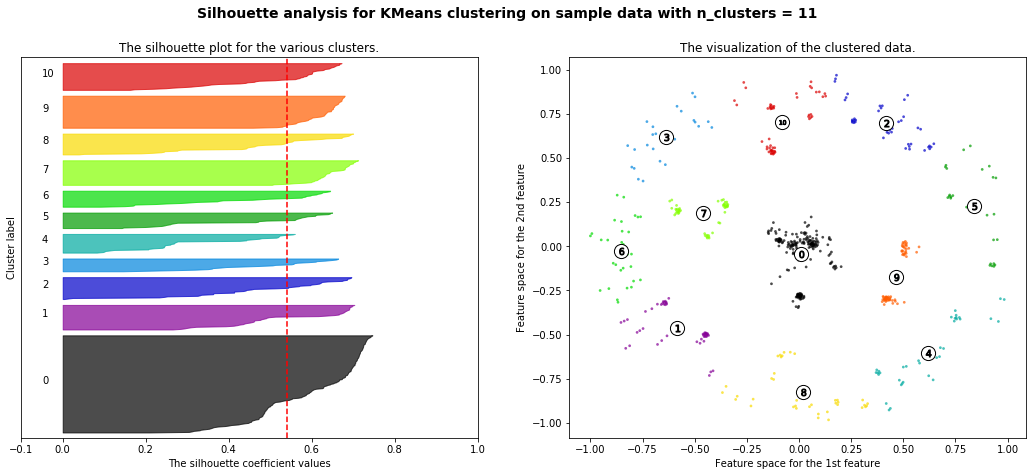

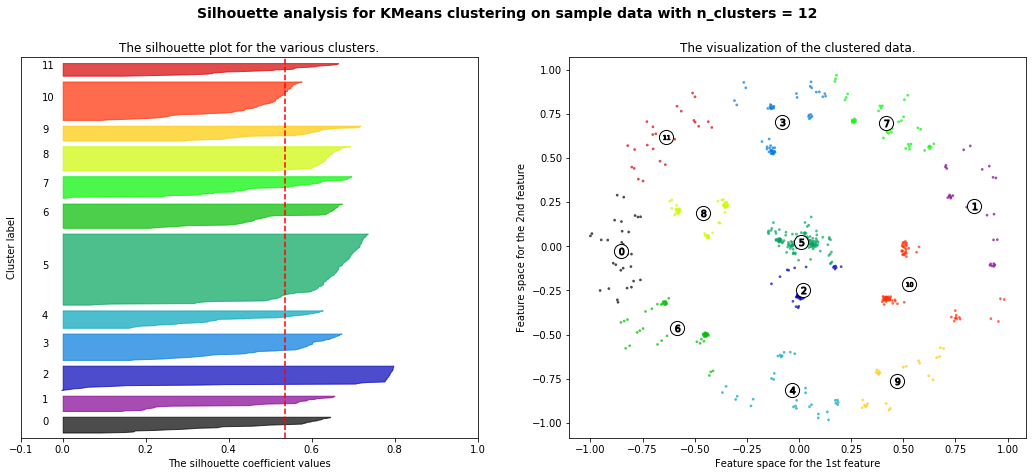

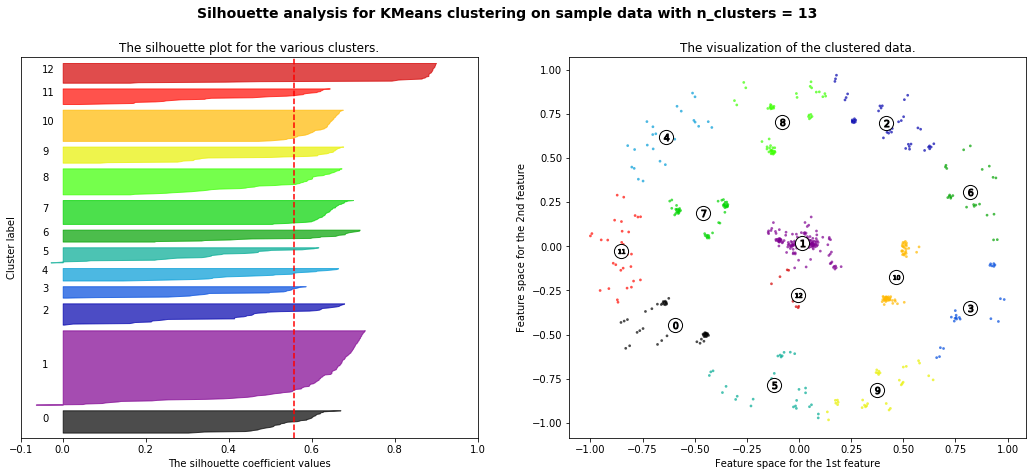

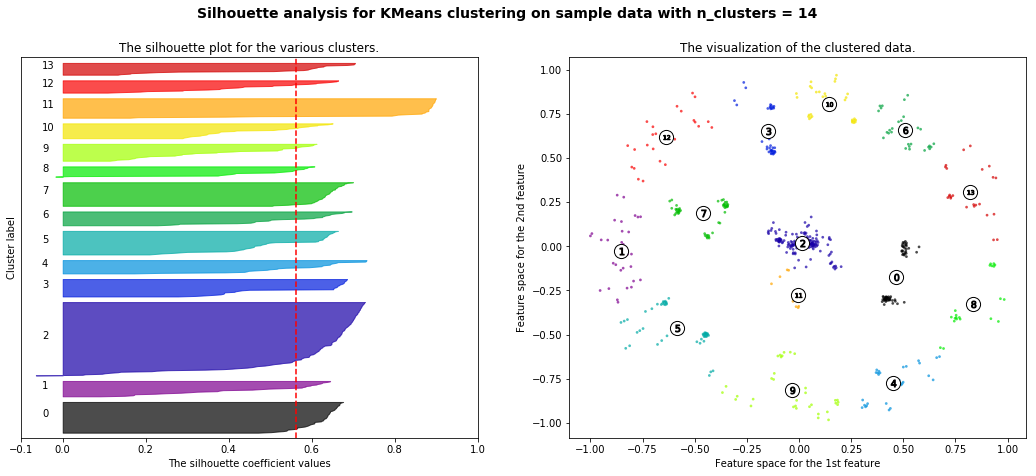

In [45]:
#Find the optimum value of clusters by looking at the silhoutte coefficients
range_n_clusters = list(range(5,15))
generate_cluster_analysis(coordinates_80, coordinates_all_80, False)

For n_clusters = 11 The average silhouette_score is : 0.5393709313947378


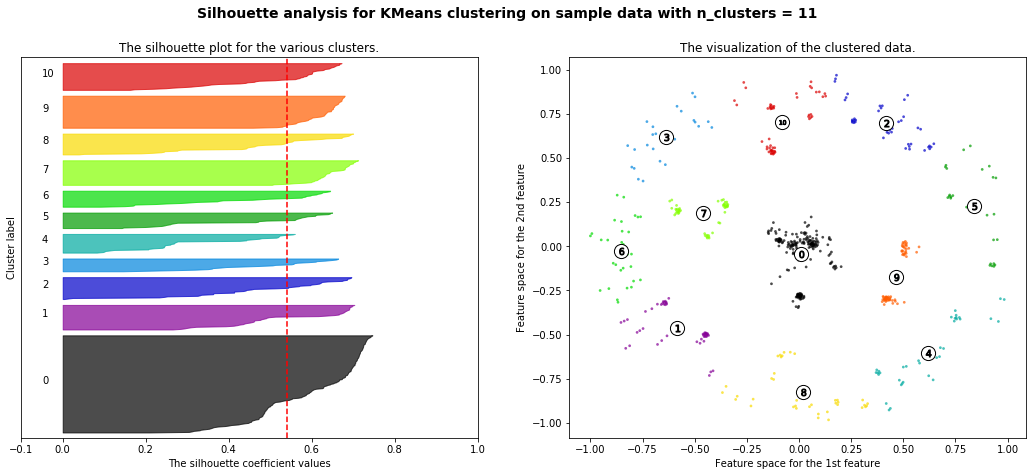

generating_dicts


In [94]:
#seleting 11 clusters for threshold of 0.80
range_n_clusters = [11]
generate_cluster_analysis(coordinates_80,coordinates_all_80,True)
#create dictionary

In [93]:
def generate_business_dictionary(coordinates_all):
    print("generating_dicts")
    cluster_business_dict = {}
    for index, row in coordinates_all.iterrows():
        cluster_business_dict.setdefault(row['cluster_label'],[]).append(row['id'])
#     print(cluster_business_dict)
#     print(sorted(cluster_business_dict.keys()))
    business_cluster_dict = {}
    for index, row in coordinates_all.iterrows():
        business_cluster_dict[row['id']] = row['cluster_label']
#     print(business_cluster_dict)